# 1. Dendrogram based clustering

In [1]:
# Agglomerative Clustering - A greedy algorithm
# We use dendograms to visualize the heirarchical clustering
# For the clustering part we can use various distance metrics

# Also, we have to think how do we going to join the clusters ? 
# we have single-linkage - use minimum distance between any 2 points in two clusters. Disadvantage is chain effect 
# Complete-linkage - use maximum distance between any 2 points in two clusters. 
# MEan distance (UPGMA) - mean of distances between all the points in two clusters
# Ward's criterion - minimum increase in variance after joining them together

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Creating data 
D = 2
s = 0

mu1 = np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

N = 900 # number of samples
X = np.zeros((N, D))
X[:300, :] = np.random.randn(300, D) + mu1
X[300:600, :] = np.random.randn(300, D) + mu2
X[600:, :] = np.random.randn(300, D) + mu3

Z = linkage(X, 'ward')
print("Z.shape:", Z.shape)

# Z has the format [idx1, idx2, dist, sample_count]
# therefore, its size will be (N-1, 4)

Z.shape: (899, 4)


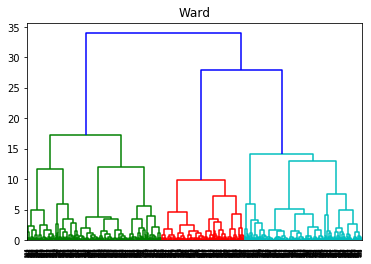

In [4]:
# from documentation:
# A (n-1) by 4 matrix Z is returned. At the i-th iteration,
# clusters with indices Z[i, 0] and Z[i, 1] are combined to
# form cluster n + i. A cluster with an index less than n
# corresponds to one of the original observations.
# The distance between clusters Z[i, 0] and Z[i, 1] is given
# by Z[i, 2]. The fourth value Z[i, 3] represents the number
# of original observations in the newly formed cluster.
# plt.figure(figsize=(8, 12))
plt.title("Ward")
dendrogram(Z)
plt.show()

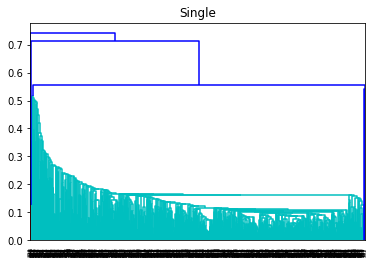

In [5]:
# We can see chaining effect happening here
Z = linkage(X, 'single')
# plt.figure(figsize=(8, 12))
plt.title("Single")
dendrogram(Z)
plt.show()

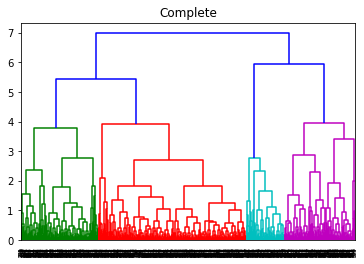

In [6]:
Z = linkage(X, 'complete')
# plt.figure(figsize=(8, 12))
plt.title("Complete")
dendrogram(Z)
plt.show()

# 2. Simulating Evolution using Heirarchical Clustering

In [7]:
import random
import numpy as np
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# our genetic code
code = ['A', 'T', 'C', 'G']


# convert list of integers to corresponding letters
def to_code(a):
  return [code[i] for i in a]


# distance between 2 DNA strands
def dist(a, b):
  return sum(i != j for i, j in zip(a, b))


# generate offspring by modifying some characters in the code
def generate_offspring(parent):
  return [maybe_modify(c) for c in parent]


# modify letter c with probability ~1/1000
def maybe_modify(c):
  if np.random.random() < 0.001:
    return np.random.choice(code)
  return c

In [8]:
# create 3 distinct ancestors
p1 = to_code(np.random.randint(4, size=1000))
p2 = to_code(np.random.randint(4, size=1000))
p3 = to_code(np.random.randint(4, size=1000))

In [9]:
# create offspring
num_generations = 99
max_offspring_per_generation = 1000
current_generation = [p1, p2, p3]

for i in range(num_generations):
    
  next_generation = []
  for parent in current_generation:
    # each parent will have between 1 and 3 children
    num_offspring = np.random.randint(3) + 1

    # generate the offspring
    for _ in range(num_offspring):
      child = generate_offspring(parent)
      next_generation.append(child)

  current_generation = next_generation

  # limit the number of offspring
  random.shuffle(current_generation)
  current_generation = current_generation[:max_offspring_per_generation]

  print("Finished creating generation %d / %d, size = %d" % (i + 2, num_generations + 1, len(current_generation)))

Finished creating generation 2 / 100, size = 3
Finished creating generation 3 / 100, size = 5
Finished creating generation 4 / 100, size = 11
Finished creating generation 5 / 100, size = 19
Finished creating generation 6 / 100, size = 40
Finished creating generation 7 / 100, size = 79
Finished creating generation 8 / 100, size = 164
Finished creating generation 9 / 100, size = 351
Finished creating generation 10 / 100, size = 718
Finished creating generation 11 / 100, size = 1000
Finished creating generation 12 / 100, size = 1000
Finished creating generation 13 / 100, size = 1000
Finished creating generation 14 / 100, size = 1000
Finished creating generation 15 / 100, size = 1000
Finished creating generation 16 / 100, size = 1000
Finished creating generation 17 / 100, size = 1000
Finished creating generation 18 / 100, size = 1000
Finished creating generation 19 / 100, size = 1000
Finished creating generation 20 / 100, size = 1000
Finished creating generation 21 / 100, size = 1000
Finis

In [10]:
# create distance matrix
# note: you can also use scipy's pdist for this
# but NOT sklearn's pairwise_distances function
# which does not return a symmetric matrix
N = len(current_generation)
dist_matrix = np.zeros((N, N))
for i in range(N):
  for j in range(N):
    if i == j:
      continue
    elif j > i:
      a = current_generation[i]
      b = current_generation[j]
      dist_matrix[i,j] = dist(a, b)
    else:
      dist_matrix[i,j] = dist_matrix[j,i]

dist_array = ssd.squareform(dist_matrix)

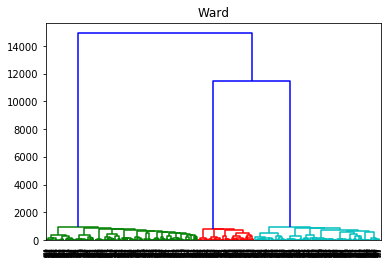

In [11]:
Z = linkage(dist_array, 'ward')
# plt.figure(figsize=(8, 12))
plt.title("Ward")
dendrogram(Z)
plt.show()

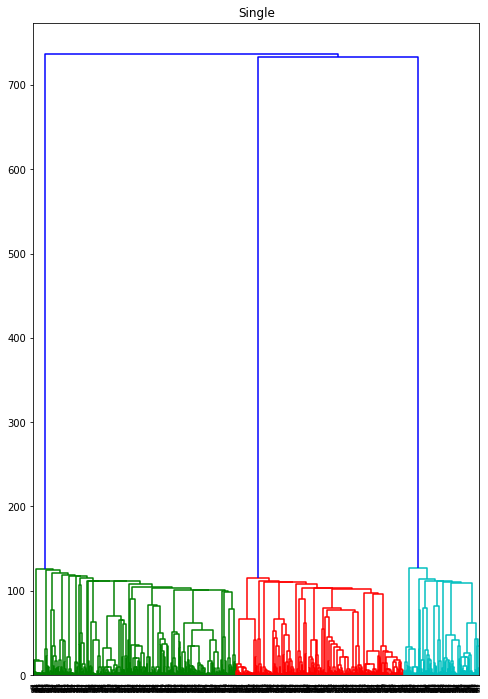

In [12]:
Z = linkage(dist_array, 'single')
plt.figure(figsize=(8, 12))
plt.title("Single")
dendrogram(Z)
plt.show()

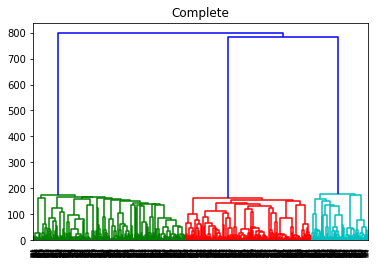

In [13]:
Z = linkage(dist_array, 'complete')
# plt.figure(figsize=(8, 12))
plt.title("Complete")
dendrogram(Z)
plt.show()

# 3. Applying Hierarchical Clustering on tweets

In [14]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import pairwise_distances ### fast, but result not symmetri

In [15]:
# load stopwords
# selected after observing results without stopwords
stopwords = [
  'the',
  'about',
  'an',
  'and',
  'are',
  'at',
  'be',
  'can',
  'for',
  'from',
  'if',
  'in',
  'is',
  'it',
  'of',
  'on',
  'or',
  'that',
  'this',
  'to',
  'you',
  'your',
  'with',
]

In [16]:
# find urls and twitter usernames within a string
url_finder = re.compile(r"(?:\@|https?\://)\S+")


def filter_tweet(s):
  s = s.lower() # downcase
  s = url_finder.sub("", s) # remove urls and usernames
  return s

In [17]:
### load data ###
df = pd.read_csv('./data/tweets.csv')
text = df.text.tolist()
text = [filter_tweet(s) for s in text]


# transform the text into a data matrix
tfidf = TfidfVectorizer(max_features=100, stop_words=stopwords)
X = tfidf.fit_transform(text).todense()


# subsample for efficiency
# remember: calculating distances is O(N^2)
N = X.shape[0]
idx = np.random.choice(N, size=2000, replace=False)
x = X[idx]
labels = df.handle[idx].tolist()

In [18]:
# proportions of each label
# so we can be confident that each is represented equally
pTrump = sum(1.0 if e == 'realDonaldTrump' else 0.0 for e in labels) / len(labels)
print("proportion @realDonaldTrump: %.3f" % pTrump)
print("proportion @HillaryClinton: %.3f" % (1 - pTrump))

proportion @realDonaldTrump: 0.502
proportion @HillaryClinton: 0.498


In [19]:
# transform the data matrix into pairwise distances list
dist_array = pdist(x)

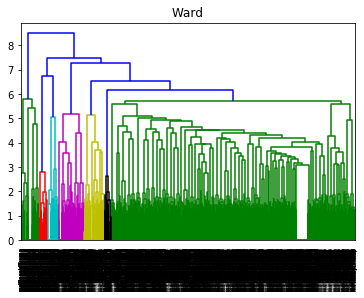

In [20]:
# calculate hierarchy
Z = linkage(dist_array, 'ward')
plt.title("Ward")
dendrogram(Z, labels=labels)
plt.show()

In [21]:
### hits max recursion depth
# Z = linkage(dist_array, 'single')
# plt.title("Single")
# dendrogram(Z, labels=labels)
# plt.show()

# Z = linkage(dist_array, 'complete')
# plt.title("Complete")
# dendrogram(Z, labels=labels)
# plt.show()

In [22]:
# convert labels to (1, 2), not (0, 1)
# since that's what's returned by fcluster
Y = np.array([1 if e == 'realDonaldTrump' else 2 for e in labels])

In [23]:
# get cluster assignments
# threshold 9 was chosen empirically to yield 2 clusters
C = fcluster(Z, 9, criterion='distance') # returns 1, 2, ..., K
categories = set(C)
# sanity check: should be {1, 2}
print("values in C:", categories)

values in C: {1}


In [24]:
### calculate the purity of our clusters ###
def purity(true_labels, cluster_assignments, categories):
  # maximum purity is 1, higher is better
  N = len(true_labels)

  total = 0.0
  for k in categories:
    max_intersection = 0
    for j in categories:
      intersection = ((cluster_assignments == k) & (true_labels == j)).sum()
      if intersection > max_intersection:
        max_intersection = intersection
    total += max_intersection
  return total / N

In [25]:
# What purity suggests ?
print("purity:", purity(Y, C, categories))

purity: 0.502


In [26]:
# we know the smaller cluster is the trump cluster
#
# important note: we call it the trump cluster from
# observing AFTER the fact that most tweets in this
# cluster are by trump
# we do NOT use those labels to create the cluster
#
# we create the clusters using a distance-based
# algorithm which knows nothing about the labels,
# just the tf-idf scores.
#
# it just so happens that most of the tweets in
# one of the clusters is by trump, and that this
# cluster is very small
if (C == 1).sum() < (C == 2).sum():
  d = 1
  h = 2
else:
  d = 2
  h = 1

actually_donald = ((C == d) & (Y == 1)).sum()
donald_cluster_size = (C == d).sum()
print("purity of @realDonaldTrump cluster:", float(actually_donald) / donald_cluster_size)

actually_hillary = ((C == h) & (Y == 2)).sum()
hillary_cluster_size = (C == h).sum()
print("purity of @HillaryClinton cluster:", float(actually_hillary) / hillary_cluster_size)

purity of @realDonaldTrump cluster: nan
purity of @HillaryClinton cluster: 0.498


C:\Users\sharm\anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


In [27]:
# just for interest, how would a classifier do?
# note: classification is always easier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X, df.handle)
print("classifier score:", rf.score(X, df.handle))

classifier score: 0.9553072625698324


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_true=df.handle, y_pred=rf.predict(X)))

                 precision    recall  f1-score   support

 HillaryClinton       0.93      0.98      0.96      3226
realDonaldTrump       0.98      0.93      0.95      3218

       accuracy                           0.96      6444
      macro avg       0.96      0.96      0.96      6444
   weighted avg       0.96      0.96      0.96      6444



In [29]:
# same as mnist
# classifier yields almost 100% accuracy
# but purity of clustering is much lower



# what words have the highest tf-idf in cluster 1? in cluster 2?
w2i = tfidf.vocabulary_

In [30]:
# tf-idf vectorizer todense() returns a matrix rather than array
# matrix always wants to be 2-D, so we convert to array in order to flatten
d_avg = np.array(x[C == d].mean(axis=0)).flatten()
d_sorted = sorted(w2i.keys(), key=lambda w: -d_avg[w2i[w]])

print("\nTop 10 'Donald cluster' words:")
print("\n".join(d_sorted[:10]))


Top 10 'Donald cluster' words:
who
will
make
last
donald
trump
said
not
was
know


C:\Users\sharm\anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:447: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
C:\Users\sharm\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [31]:
h_avg = np.array(x[C == h].mean(axis=0)).flatten()
h_sorted = sorted(w2i.keys(), key=lambda w: -h_avg[w2i[w]])

print("\nTop 10 'Hillary cluster' words:")
print("\n".join(h_sorted[:10]))


Top 10 'Hillary cluster' words:
trump
hillary
we
will
thank
our
not
he
donald
great
